In [48]:
import pandas as pd

In [49]:
datambg = pd.read_csv("data/datambg.csv")

In [50]:
datasarc = pd.read_csv("data/datasarc.csv")

In [51]:
datastest = pd.read_csv("data/datatest.csv")

In [52]:
import requests

# Unduh kamus leksikon positif dan negatif dari GitHub
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep="\t", header=None)[0])

# Fungsi untuk menentukan sentimen dan menghitung skornya
def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count
        if sentiment_score > 0:
            sentiment = "Positif"
        elif sentiment_score < 0:
            sentiment = "Negatif"
        else:
            sentiment = "Netral"
        return sentiment_score, sentiment
    return 0, "Netral"

In [53]:
datambg = pd.DataFrame(datambg['steming_data'])

In [54]:
datambg.head()

,steming_data
0,makan siang gratis mending
1,bela mbak bias sekolah makan siang gratis pas ...
2,anggar dituruninnya ngopernya blog ya dicicipi...
3,karyawan industri cikarang makan siang jemput ...
4,ambil abang ya makan siang gratis ya abang rol...


In [55]:
datambg[['Score', 'Sentiment']] = datambg['steming_data'].apply(lambda x: pd.Series(determine_sentiment(x)))

In [56]:
datambg.head()

,steming_data,Score,Sentiment
0,makan siang gratis mending,1,Positif
1,bela mbak bias sekolah makan siang gratis pas ...,1,Positif
2,anggar dituruninnya ngopernya blog ya dicicipi...,3,Positif
3,karyawan industri cikarang makan siang jemput ...,3,Positif
4,ambil abang ya makan siang gratis ya abang rol...,2,Positif


In [57]:
del datambg['Score']

In [58]:
datambg.head()

,steming_data,Sentiment
0,makan siang gratis mending,Positif
1,bela mbak bias sekolah makan siang gratis pas ...,Positif
2,anggar dituruninnya ngopernya blog ya dicicipi...,Positif
3,karyawan industri cikarang makan siang jemput ...,Positif
4,ambil abang ya makan siang gratis ya abang rol...,Positif


In [61]:
datambg.tail()

,steming_data,Sentiment
9164,usaha pulih sebentar program makan siang grati...,Netral
9165,status program makan siang gratis sumber dana ...,Negatif
9166,pemkab bima tunggu teknik program makan siang ...,Netral
9167,program makan siang gizi gratis sumbar januari,Positif
9168,tahan menteri alas super tolol menteri kabinet...,Netral


In [60]:
datasarc.head()

,tweet,tweet_cleaning,tweet_casefolding,normalisasi,label,tokenize,stopword removal,steming_data
0,Terimakasih atas pengkhianatan ini Terimakasih...,Terimakasih atas pengkhianatan ini Terimakasih...,terimakasih khianat terimakasih antipati juang...,terimakasih khianat terimakasih antipati juang...,1,"['terimakasih', 'khianat', 'terimakasih', 'ant...","['terimakasih', 'khianat', 'terimakasih', 'ant...",terimakasih khianat terimakasih antipati juang...
1,Stlh Kerajaan Kerathon Sejagad kini ada lg SUN...,Stlh Kerajaan Kerathon Sejagad kini ada lg SUN...,stlh raja kerathon sejagad lg sunda empire tol...,setelah raja kerathon sejagad lagi sunda empir...,1,"['setelah', 'raja', 'kerathon', 'sejagad', 'la...","['raja', 'kerathon', 'sejagad', 'sunda', 'empi...",raja kerathon sejagad sunda empire tolol hqq
2,Horeeee......?????? Mantaaab ?? Kelakuan bejat...,Horeeee Mantaaab Kelakuan bejat Andre Dengan m...,horeeee mantaaab laku bejat andre jebak nn ser...,horeeee mantaaab laku bejat andre jebak nn ser...,1,"['horeeee', 'mantaaab', 'laku', 'bejat', 'andr...","['horeeee', 'mantaaab', 'laku', 'bejat', 'andr...",horeeee mantaaab laku bejat andre jebak nn ser...
3,Partai Allah mah Bebas Sajadahpun boleh diinja...,Partai Allah mah Bebas Sajadahpun boleh diinja...,partai allah mah bebas sajadah diinjak2 hashtag,partai allah mah bebas sajadah diinjak2 hashtag,1,"['partai', 'allah', 'mah', 'bebas', 'sajadah',...","['partai', 'allah', 'mah', 'bebas', 'sajadah',...",partai allah mah bebas sajadah diinjak2 hashtag
4,Buat para pembenci Selamat anda dipimpin oleh ...,Buat para pembenci Selamat anda dipimpin oleh ...,benci selamat pimpin orang benci selamat nikma...,benci selamat pimpin orang benci selamat nikma...,1,"['benci', 'selamat', 'pimpin', 'orang', 'benci...","['benci', 'selamat', 'pimpin', 'orang', 'benci...",benci selamat pimpin orang benci selamat nikma...


In [75]:
datasarcastic = datasarc[['steming_data', 'label']]

In [76]:
datasarcastic['label'] = datasarcastic['label'].replace({1: 'Negatif'})

C:\Users\UMMY\AppData\Local\Temp\ipykernel_19912\3256700592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasarcastic['label'] = datasarcastic['label'].replace({1: 'Negatif'})


In [77]:
datasarcastic.head()

,steming_data,label
0,terimakasih khianat terimakasih antipati juang...,Negatif
1,raja kerathon sejagad sunda empire tolol hqq,Negatif
2,horeeee mantaaab laku bejat andre jebak nn ser...,Negatif
3,partai allah mah bebas sajadah diinjak2 hashtag,Negatif
4,benci selamat pimpin orang benci selamat nikma...,Negatif


In [78]:
datastest.head()

,tweet,tweet_cleaning,tweet_casefolding,normalisasi,label,tokenize,stopword removal,steming_data
0,saraswati pintar sekali tida belajar dari peng...,saraswati pintar sekali tida belajar dari peng...,saraswati pintar tida ajar alam hufffffffffffff,saraswati pintar tida ajar alam hufffffffffffff,1,"['saraswati', 'pintar', 'tida', 'ajar', 'alam'...","['saraswati', 'pintar', 'tida', 'ajar', 'alam'...",saraswati pintar tida ajar alam hufffffffffffff
1,Menag bicara sola celana cingkrang gak bisa ik...,Menag bicara sola celana cingkrang gak bisa ik...,menag bicara sola celana cingkrang gak atur lh...,menag bicara sola celana cingkrang tidak atur ...,0,"['menag', 'bicara', 'sola', 'celana', 'cingkra...","['menag', 'bicara', 'sola', 'celana', 'cingkra...",menag bicara sola celana cingkrang atur loh li...
2,Koruptor dihukum berat bukannya dikasih kering...,Koruptor dihukum berat bukannya dikasih kering...,koruptor hukum berat kasih ringan hashtag,koruptor hukum berat kasih ringan hashtag,0,"['koruptor', 'hukum', 'berat', 'kasih', 'ringa...","['koruptor', 'hukum', 'berat', 'kasih', 'ringa...",koruptor hukum berat kasih ringan hashtag
3,Belum jadi pemimpin udah bikin hoax gmn kalau ...,Belum jadi pemimpin udah bikin hoax gmn kalau ...,pimpin udah bikin hoax gmn jabat parah,pimpin sudah bikin hoax bagaimana jabat parah,0,"['pimpin', 'sudah', 'bikin', 'hoax', 'bagaiman...","['pimpin', 'bikin', 'hoax', 'jabat', 'parah']",pimpin bikin hoax jabat parah
4,Karena JUJUR membuatku malu dan merasa bersala...,Karena JUJUR membuatku malu dan merasa bersala...,jujur buat malu salah jkw sulit laku,jujur buat malu salah jkw sulit laku,1,"['jujur', 'buat', 'malu', 'salah', 'jkw', 'sul...","['jujur', 'malu', 'salah', 'jkw', 'sulit', 'la...",jujur malu salah jkw sulit laku


In [79]:
datasarctest = datastest[['steming_data', 'label']]

In [83]:
datasarctest['label'] = datasarctest['label'].replace({1: 'Negatif', 0: 'Positif'})

C:\Users\UMMY\AppData\Local\Temp\ipykernel_19912\207306895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasarctest['label'] = datasarctest['label'].replace({1: 'Negatif', 0: 'Positif'})


In [84]:
datasarctest.head()

,steming_data,label
0,saraswati pintar tida ajar alam hufffffffffffff,Negatif
1,menag bicara sola celana cingkrang atur loh li...,Positif
2,koruptor hukum berat kasih ringan hashtag,Positif
3,pimpin bikin hoax jabat parah,Positif
4,jujur malu salah jkw sulit laku,Negatif


In [85]:
datambg.to_csv("mbglabel.csv", index=False)

In [86]:
datasarcastic.to_csv("sarcasticlabel.csv", index=False)

In [87]:
datasarctest.to_csv("sarctestlabel.csv", index=False)

C:\Users\UMMY\AppData\Local\Temp\ipykernel_2100\1282206943.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


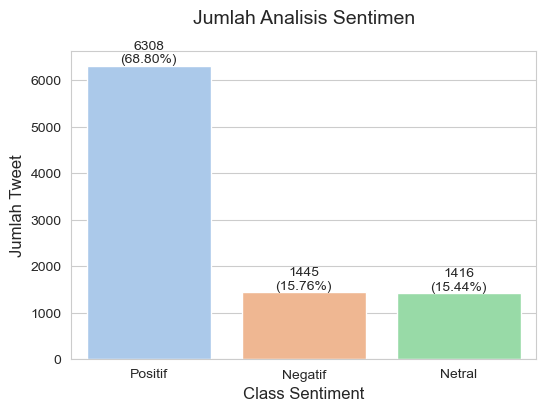

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [ ]:
data.to_csv('Hasil_Labelling_Data.csv, index=False')

In [ ]:
data = pd.read_csv("Hasil_Labelling_Data.csv, index=False")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

cleaned_data = data.dropna(subset=['steming_data'])

X = cleaned_data['steming_data']
y = cleaned_data['Sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))
print('===========================')

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

X_train_vec.shape, X_test_vec.shape

Jumlah data latih: 7335
Jumlah data uji: 1834


((7335, 11141), (1834, 11141))

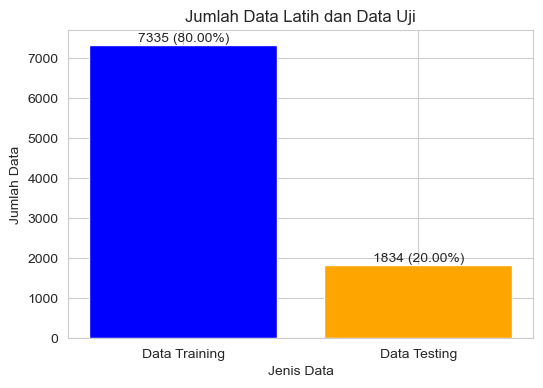

In [ ]:
import matplotlib.pyplot as plt


train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()


## Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
}

# Train models
results = {}
for model_name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    results[model_name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }


Confusion Matrix for Random Forest:


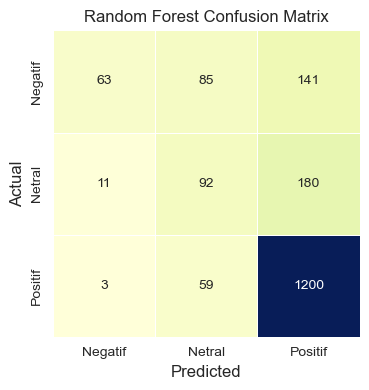

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for model_name, result in results.items():
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(
        result["confusion_matrix"],
        annot=True,
        fmt='d',
        cmap="YlGnBu",
        cbar=False,
        xticklabels=['Negatif', 'Netral', 'Positif'],
        yticklabels=['Negatif', 'Netral', 'Positif'],
        ax=ax,
        square=True,
        linewidths=0.5
    )
    print(f"\nConfusion Matrix for {model_name}:")
    ax.set_title(f"{model_name} Confusion Matrix", fontsize=12)
    ax.set_xlabel("Predicted", fontsize=12)
    ax.set_ylabel("Actual", fontsize=12)


    plt.tight_layout()
    plt.show()


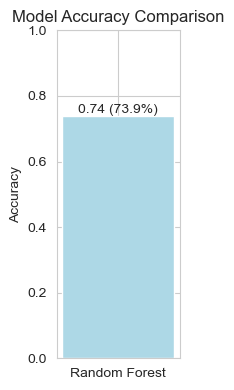

In [ ]:
import matplotlib.pyplot as plt

accuracies = {model: result['accuracy'] for model, result in results.items()}

plt.figure(figsize=(2, 4))
bars = plt.bar(list(accuracies.keys()), list(accuracies.values()), color=['lightblue', 'lightgreen', 'lightcoral', 'plum'])

for bar in bars:
    accuracy = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        accuracy,
        f'{accuracy:.2f} ({accuracy * 100:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
from IPython.display import display

for model_name, result in results.items():
    print(f"\nClassification Report for {model_name}:")

    report_df = pd.DataFrame(result['classification_report']).transpose()

    styled_df = report_df.style.background_gradient(cmap="coolwarm")
    styled_df = styled_df.format(precision=3)
    display(styled_df)


Classification Report for Random Forest:


,precision,recall,f1-score,support
Negatif,0.818,0.218,0.344,289.000
Netral,0.390,0.325,0.355,283.000
Positif,0.789,0.951,0.862,1262.000
accuracy,0.739,0.739,0.739,0.739
macro avg,0.666,0.498,0.520,1834.000
weighted avg,0.732,0.739,0.702,1834.000


## LSTM

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting relevant columns
texts = data['steming_data'].astype(str).values
labels = data['Sentiment'].values

# Encoding labels into numeric values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, encoded_labels, test_size=0.2, random_state=42)

print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")

Training data size: 7335
Testing data size: 1834


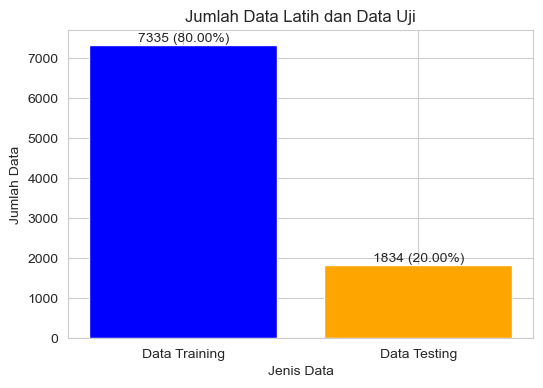

In [ ]:
# Encode labels
le = LabelEncoder()
Y = encoded_labels
Y = le.fit_transform(Y)
X = texts


train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

In [ ]:
# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
max_len = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Model Building
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\UMMY\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Train the model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test))

# Evaluate the model
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9864 - loss: 0.0493 - val_accuracy: 0.8419 - val_loss: 0.7942
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9908 - loss: 0.0355 - val_accuracy: 0.8413 - val_loss: 0.8564
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.9918 - loss: 0.0333 - val_accuracy: 0.8468 - val_loss: 0.8850
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.9953 - loss: 0.0191 - val_accuracy: 0.8462 - val_loss: 0.8041
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - accuracy: 0.9954 - loss: 0.0185 - val_accuracy: 0.8451 - val_loss: 0.8950
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - accuracy: 0.9917 - loss: 0.0322 - val_accuracy: 0.8397 - val_loss: 0.9107
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.9970 - loss: 0.0112 - val_accuracy: 0.8304 - val_loss: 1.0166
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.9978 - loss: 0.0091 - 

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print()


# Classification Report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print(report)

Accuracy: 0.8304252998909487
Accuracy: 83.04%

              precision    recall  f1-score   support

     Negatif       0.82      0.76      0.79       297
      Netral       0.48      0.63      0.54       274
     Positif       0.94      0.89      0.91      1263

    accuracy                           0.83      1834
   macro avg       0.75      0.76      0.75      1834
weighted avg       0.85      0.83      0.84      1834



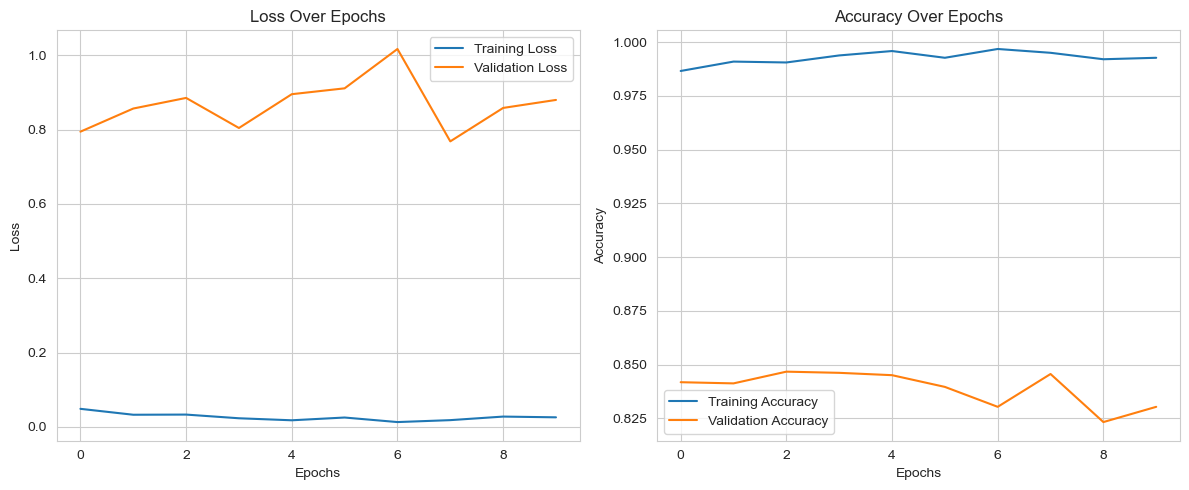

In [ ]:
# Plot Training and Validation Loss and Accuracy
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

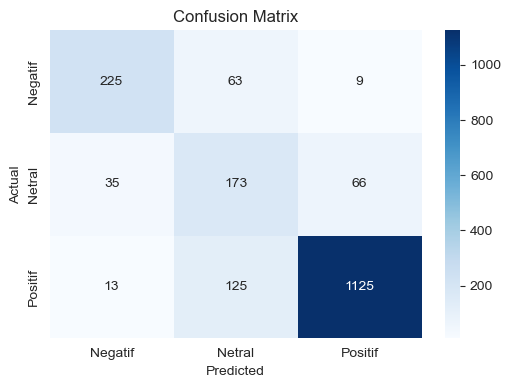

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
X = texts
y = encoded_labels

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, data.index, test_size=0.2, random_state=42)

# Gunakan indeks test untuk mengambil data asli
data_test = data.iloc[indices_test].reset_index(drop=True)

predictions = pd.DataFrame({
    'steming_data': data_test['steming_data'],
    'Actual': label_encoder.inverse_transform(y_test),
    'Predicted': label_encoder.inverse_transform(y_pred_classes)
})

# Simpan ke CSV
predictions.to_csv('Hasil_Predictions_lstm.csv', index=False)
predictions.head()

,steming_data,Actual,Predicted
0,halo maaf oppa sibuk promosi nih sok ic kabar ...,Positif,Positif
1,mkan sih makan siang gratis ya,Positif,Positif
2,sih program makan siang gratis realisasi feedb...,Positif,Positif
3,ppn sukses program makan siang gratis makan si...,Positif,Positif
4,ngebanding makan gizi gratis makan siang box c...,Positif,Positif


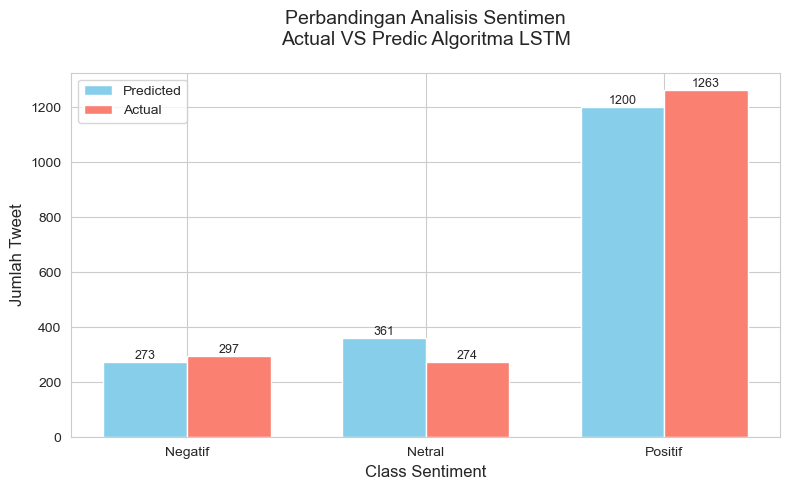

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

predicted_counts = predictions['Actual'].value_counts().sort_index()
actual_counts = predictions['Predicted'].value_counts().sort_index()

comparison_df = pd.DataFrame({
    'Predicted': actual_counts,
    'Actual': predicted_counts
}).fillna(0)

# Buat plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 5))

bar_width = 0.35
index = range(len(comparison_df))

# Plot Actual
ax.bar([i - bar_width/2 for i in index], comparison_df['Predicted'], width=bar_width, label='Predicted', color='skyblue')

# Plot Predicted
ax.bar([i + bar_width/2 for i in index], comparison_df['Actual'], width=bar_width, label='Actual', color='salmon')

# Set label dan title
ax.set_xlabel('Class Sentiment', fontsize=12)
ax.set_ylabel('Jumlah Tweet', fontsize=12)
ax.set_title('Perbandingan Analisis Sentimen\nActual VS Predic Algoritma LSTM', fontsize=14, pad=20)
ax.set_xticks(index)
ax.set_xticklabels(comparison_df.index)
ax.legend()

# Tambahkan jumlah di atas bar
for i in index:
    actual = comparison_df['Predicted'].iloc[i]
    predicted = comparison_df['Actual'].iloc[i]
    ax.text(i - bar_width/2, actual + 0.01, int(actual), ha='center', va='bottom', fontsize=9)
    ax.text(i + bar_width/2, predicted + 0.01, int(predicted), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

predictions['Random Forest Predicted'] = rf_model.predict(X_test)

# Menghitung jumlah untuk setiap kelas dari data aktual dan hasil prediksi
actual_counts = predictions['Actual'].value_counts().sort_index()
lstm_counts = predictions['Predicted'].value_counts().sort_index()
rf_counts = predictions['Random Forest Predicted'].value_counts().sort_index()


# --- MODIFIKASI: Buat DataFrame perbandingan dengan tiga kolom ---
comparison_df = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted (LSTM)': lstm_counts,
    'Random Forest': rf_counts
}).fillna(0)


# --- Buat Plot ---
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6)) # Ukuran disesuaikan agar tidak sempit

# --- MODIFIKASI: Sesuaikan lebar bar untuk tiga bar ---
bar_width = 0.25
index = range(len(comparison_df))

# Plot Actual (paling kiri)
ax.bar([i - bar_width for i in index], comparison_df['Actual'], width=bar_width, label='Actual', color='salmon')

# Plot Predicted LSTM (tengah)
ax.bar(index, comparison_df['Predicted (LSTM)'], width=bar_width, label='Predicted (LSTM)', color='skyblue')

# --- MODIFIKASI: Plot Predicted Random Forest (paling kanan) ---
ax.bar([i + bar_width for i in index], comparison_df['Random Forest'], width=bar_width, label='Random Forest', color='lightgreen')


# Set label dan title
ax.set_xlabel('Class Sentiment', fontsize=12)
ax.set_ylabel('Jumlah Tweet', fontsize=12)
# --- MODIFIKASI: Judul diperbarui ---
ax.set_title('Perbandingan Analisis Sentimen\nActual vs LSTM vs Random Forest', fontsize=14, pad=20)
ax.set_xticks(index)
ax.set_xticklabels(comparison_df.index)
ax.legend()


# --- MODIFIKASI: Tambahkan jumlah di atas ketiga bar ---
for i in index:
    actual = comparison_df['Actual'].iloc[i]
    lstm = comparison_df['Predicted (LSTM)'].iloc[i]
    rf = comparison_df['Random Forest'].iloc[i]
    
    ax.text(i - bar_width, actual + 0.01, int(actual), ha='center', va='bottom', fontsize=9)
    ax.text(i, lstm + 0.01, int(lstm), ha='center', va='bottom', fontsize=9)
    ax.text(i + bar_width, rf + 0.01, int(rf), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

KeyError: 'Random Forest Predicted'